In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/StressLevelDataset.csv")

In [5]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
# Getting an idea of the size of the dataset
df.shape 

(1100, 21)

In [ ]:
# Basic column names
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [ ]:
# Checking for data types, seeing if we need to clean data
df.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [ ]:
# Checking for null values
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [27]:
print(f"Average Anxiety Level: {df['anxiety_level'].mean():.2f}")

Average Anxiety Level: 11.06


In [53]:
column_means = {}
for column in df.columns:
    column_means[column] = df[column].mean()
print(column_means)
sorted_dict = dict(sorted(column_means.items(), key = lambda item: item[1], reverse = True))

{'anxiety_level': 11.063636363636364, 'self_esteem': 17.777272727272727, 'mental_health_history': 0.49272727272727274, 'depression': 12.555454545454545, 'headache': 2.5081818181818183, 'blood_pressure': 2.1818181818181817, 'sleep_quality': 2.66, 'breathing_problem': 2.7536363636363634, 'noise_level': 2.649090909090909, 'living_conditions': 2.518181818181818, 'safety': 2.7372727272727273, 'basic_needs': 2.772727272727273, 'academic_performance': 2.772727272727273, 'study_load': 2.6218181818181816, 'teacher_student_relationship': 2.648181818181818, 'future_career_concerns': 2.649090909090909, 'social_support': 1.8818181818181818, 'peer_pressure': 2.7345454545454544, 'extracurricular_activities': 2.767272727272727, 'bullying': 2.617272727272727, 'stress_level': 0.9963636363636363}


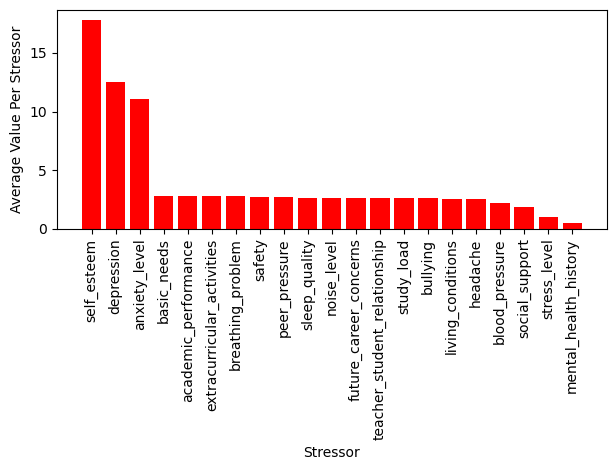

In [63]:
# Here we can plot the average

X = list(sorted_dict.keys())
y = list(sorted_dict.values())
plt.bar(X,y, color = 'RED')
plt.xticks(rotation = 90)
plt.ylabel("Average Value Per Stressor")
plt.xlabel("Stressor")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, recall_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# We start to form our target variable as well as the values we will use to obtain this. 
X = df.drop(columns = ['anxiety_level'] )
y = df['anxiety_level']

# We can set up our test train split data for model training
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
